In [78]:
import pandas as pd

In [79]:
data = pd.read_csv ("Data_Breach_Notifications_Short_File.csv")

In [ ]:
# load dataset 

In [80]:
print(data.head())

                        Name    Id  WashingtoniansAffected  Year  \
0             Delta Airlines  9561                 24563.0  2018   
1          Best Buy Co, Inc.  9562                  8390.0  2018   
2             Sears Holdings  9565                  2373.0  2018   
3       Hudson's Bay Company  9566                     NaN  2018   
4  Rail Europe North America  9567                   687.0  2018   

   DaysToIdentifyBreach  DaysElapsedBeforeNotification  
0                 183.0                           14.0  
1                 183.0                           16.0  
2                 169.0                           40.0  
3                 271.0                           28.0  
4                  79.0                           73.0  


In [ ]:
# Descriptive Statistics

In [82]:
print(data.describe())

                 Id  WashingtoniansAffected         Year  \
count    740.000000            7.140000e+02   740.000000   
mean   12513.968919            2.772875e+04  2021.193243   
std     2643.085816            1.972249e+05     2.503412   
min     9561.000000            1.500000e+01  2016.000000   
25%    10353.000000            7.782500e+02  2019.000000   
50%    11127.500000            1.598000e+03  2022.000000   
75%    15402.500000            5.192500e+03  2023.000000   
max    17529.000000            3.243664e+06  2025.000000   

       DaysToIdentifyBreach  DaysElapsedBeforeNotification  
count            632.000000                     723.000000  
mean             116.784810                      96.295989  
std              218.625351                     102.109730  
min             -503.000000                       0.000000  
25%                3.000000                      31.000000  
50%               26.500000                      59.000000  
75%              140.750000     

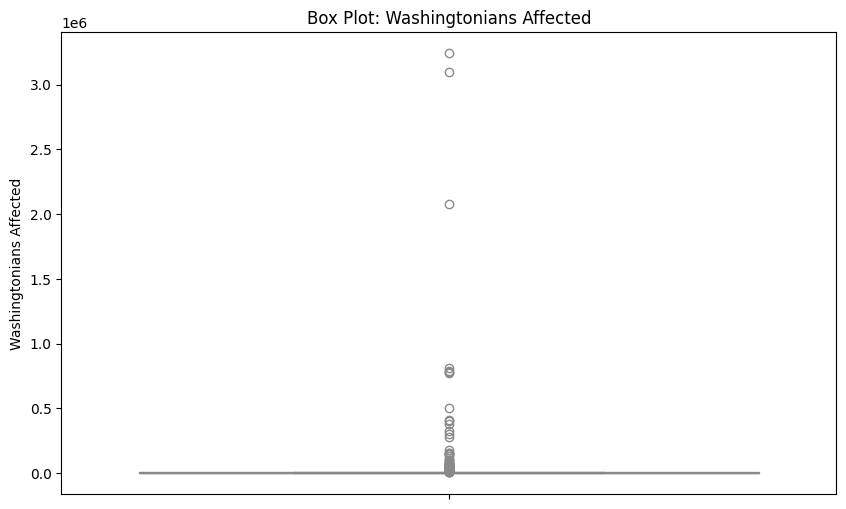

In [316]:
import statistics
data = pd.read_csv ("Data_Breach_Notifications_Short_File.csv")
import seaborn as sns 
import matplotlib.pyplot as plt

## Box Plot
my_colors = ["#FFFFCC", "#CCFFFF"]  # Set a custome color palette of pastels
sns.set_palette(sns.color_palette(my_colors))
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='WashingtoniansAffected', data=data)
plt.title("Box Plot: Washingtonians Affected")
plt.ylabel("Washingtonians Affected")
plt.show()


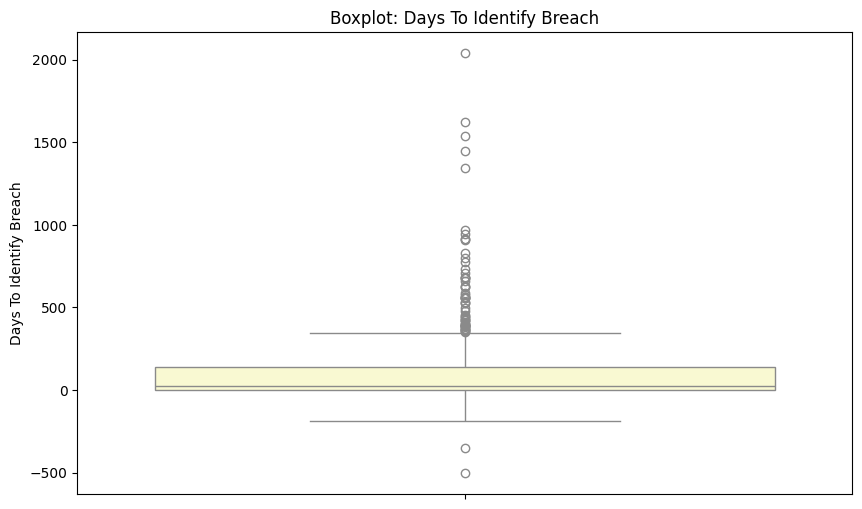

In [317]:
import statistics
data = pd.read_csv ("Data_Breach_Notifications_Short_File.csv")
import seaborn as sns 
import matplotlib.pyplot as plt

## Box Plot
my_colors = ["#FFFFCC", "#CCFFFF"]  # Set a custome color palette of pastels
sns.set_palette(sns.color_palette(my_colors))
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='DaysToIdentifyBreach', data=data)
plt.title("Boxplot: Days To Identify Breach")
plt.ylabel("Days To Identify Breach")
plt.show()

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 

In [199]:
# Visualization import matplotlib.pyplot as plt


In [201]:
import numpy as np

In [185]:
import matplotlib.pyplot as plt

In [184]:
import matplotlib.pyplot as plt

In [312]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
data = {'Year'}

# Bar plot of affected residents by type of data
plt.figure(figsize=(10, 6))
plt.barh(affected_count['type_of_data'], affected_count['Washingtonians_affected'], color='skyblue')
plt.xlabel('Number of Residents Affected')
plt.title('Residents Affected by Data Breach by Type of Data')
plt.show()


In [290]:
input_file = path + 'Data_Breach_Notifications_Short_File.csv'
df = pd.read_table(input_file, delimiter=',', header=[0])
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           740 non-null    object 
 1   Id                             740 non-null    int64  
 2   WashingtoniansAffected         714 non-null    float64
 3   Year                           740 non-null    int64  
 4   DaysToIdentifyBreach           632 non-null    float64
 5   DaysElapsedBeforeNotification  723 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 34.8+ KB


In [233]:
import numpy as np

In [59]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 

path = ""
# 
input_file = path + 'Data_Breach_Notifications_Short_File.csv'
df = pd.read_table(input_file, delimiter=',', header=[0])
df.info(verbose = True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           740 non-null    object 
 1   Id                             740 non-null    int64  
 2   WashingtoniansAffected         714 non-null    float64
 3   Year                           740 non-null    int64  
 4   DaysToIdentifyBreach           632 non-null    float64
 5   DaysElapsedBeforeNotification  723 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 34.8+ KB


In [293]:
df.describe()

df.describe().to_csv(path + "Descriptive Stats.csv")


In [9]:
# There is strong positive correlations on more individuals affected which is correspond to more days to identify.
# There is a negative correlation (more affected inviduals correspond to fewer days to breach)
# In conclusion this helps assess and interpret the correlation between the number of Washingtonians affected by the data breach and the days taken to 
# identy the breach.
df_cont = df[["WashingtoniansAffected", "DataBreach", "DaysElapsedBeforeNotification"]]
correlation_matrix = df_cont.corr()

print(correlation_matrix)


                               WashingtoniansAffected  DaysToIdentifyBreach  \
WashingtoniansAffected                       1.000000             -0.025976   
DaysToIdentifyBreach                        -0.025976              1.000000   
DaysElapsedBeforeNotification               -0.060966             -0.079481   

                               DaysElapsedBeforeNotification  
WashingtoniansAffected                             -0.060966  
DaysToIdentifyBreach                               -0.079481  
DaysElapsedBeforeNotification                       1.000000  


Density Plot for DaysToIdentifyBreach DaysToIdentifyBreach


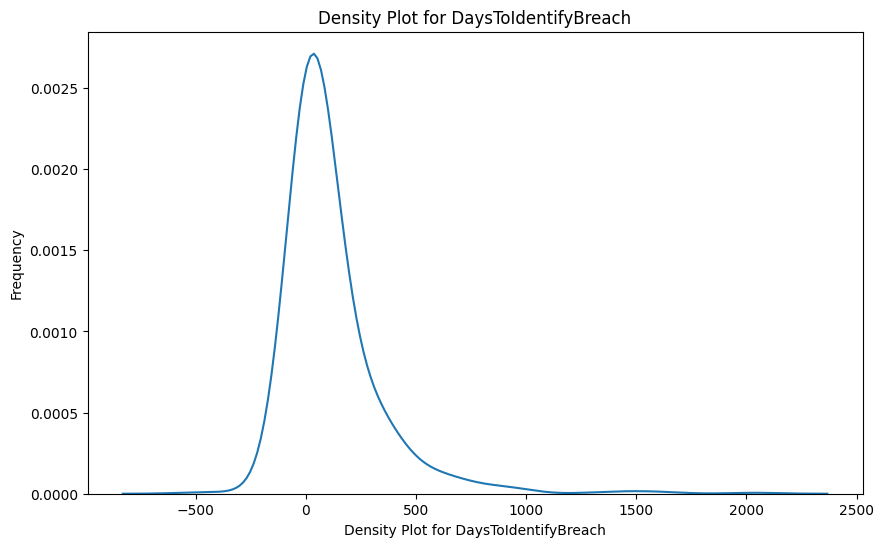

In [235]:
# density plot for DaysToIdentifyBreach
import seaborn as sns 
import matplotlib.pyplot as plt 

var_name = "DaysToIdentifyBreach"
var_title = "Density Plot for " + var_name
print(var_title, var_name)  

fig, ax = plt.subplots(figsize=(10, 6))  
plt.ticklabel_format(style='plain')
plt.xlabel(var_title)
plt.ylabel("Frequency")
plt.title(var_title)


# plotting density plot for carat using distplot() 
sns.kdeplot(np.array( df[ var_name ] ), bw_method = 0.5)
  
# visualizing plot using matplotlib.pyplot library 
# The trails of the plot show how extreme values are distributed. Long tails on the right my indicate some breaches take signicanty longer to identify than others
plt.show() 


Density Plot for DaysElapsedBeforeNotification DaysElapsedBeforeNotification


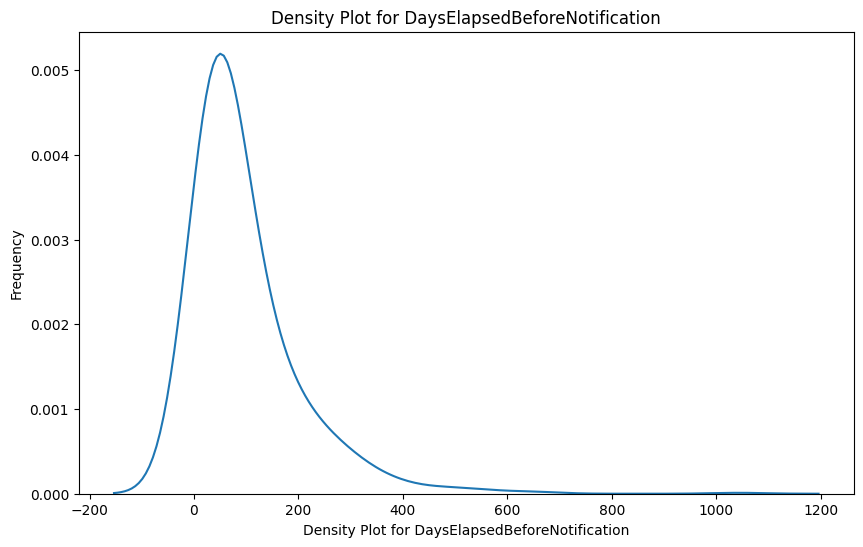

In [300]:
# density plot for DaysElapsedBeforeNotification
import seaborn as sns 
import matplotlib.pyplot as plt 

var_name = "DaysElapsedBeforeNotification"
var_title = "Density Plot for " + var_name
print(var_title, var_name)  

fig, ax = plt.subplots(figsize=(10, 6))  
plt.ticklabel_format(style='plain')
plt.xlabel(var_title)
plt.ylabel("Frequency")
plt.title(var_title)


# plotting density plot for carat using distplot() 
sns.kdeplot(np.array( df[ var_name ] ), bw_method = 0.5)
  
# visualizing plot using matplotlib.pyplot library 
# The density plot indicates how extreme values are distributed and significant delays in notification
# In conclusion the density plot helps to gain insights into the notification processess following data breaches 
plt.show() 
